In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def fun1(x):#函数1，传入的x支持数组
    return 1 / 20.0 * x ** 5 - 11 / 6.0 * x ** 3
def dfun1(x):#函数1的一阶导数
    return 1 / 4.0 * x ** 4 - 11 / 2.0 * x ** 2
def ddfun1(x):#函数1的二阶导数
    return x ** 3 - 11 * x
def fun2(x):#函数2，传入的x支持数组
    return np.exp(-1.0 / x)
def dfun2(x):#函数2的一阶导数
    return 1 / (x ** 2) * np.exp(-1 / x)
def ddfun2(x):#函数2的二阶导数
    return (x ** (-4)) * np.exp(-1 / x) - 2 * (x ** (-3)) * np.exp(-1 / x)

def slice_interval(a, b, n):#将求导区间n等分，得到n+1个端点
    temp = []#端点
    h = (b - a)/n
    for i in range(n+1):
        temp.append(a + i * h)
    return temp, h 

def dy1(slice_list, fun, h):#向前差商法计算导数
    dy_result = []
    for i in range(len(slice_list)):
        if i+1 < len(slice_list):
            dy_result.append((fun(slice_list[i+1]) - fun(slice_list[i])) / h)
    dy_result.append(0)#向前差商法无法计算后端点的导数，故添加零
    return dy_result

def dy2(slice_list, fun, h):#向后差商法计算导数
    dy_result = []
    dy_result.append(0)#向后差商法无法计算前端点的导数，故添加零
    for i in range(len(slice_list)):
        if i-1 >= 0:
            dy_result.append((fun(slice_list[i]) - fun(slice_list[i-1])) / h)
    return dy_result

def dy3(slice_list, fun, h):#中心差商法计算导数
    dy_result = []
    dy_result.append(0)#中心差商法无法计算前端点的导数，故添加零
    for i in range(len(slice_list)):
        if i-1 >= 0 and i+1 < len(slice_list):
            dy_result.append((fun(slice_list[i+1]) - fun(slice_list[i-1])) / h / 2)
    dy_result.append(0)#中心差商法无法计算后端点的导数，故添加零
    return dy_result

def ddy(slice_list, fun, h):#二阶导数
    ddy_result = []
    ddy_result.append(0)#二阶导数无法计算前端点的导数，故添加零
    for i in range(len(slice_list)):
        if i-1 >= 0 and i+1 < len(slice_list):
            ddy_result.append((fun(slice_list[i+1]) + fun(slice_list[i-1]) - 2 * fun(slice_list[i])) / h / h)
    ddy_result.append(0)#二阶导数无法计算后端点的导数，故添加零
    return ddy_result

10 等分区间后，向前差商法所得导数与实际一阶导数的误差值（忽略右端点）：
[ 0.07325333  0.29125333  0.50285333  0.70325333  0.88765333  1.05125333
  1.18925333  1.29685333  1.36925333  1.40165333 18.        ]
10 等分区间后，向后差商法所得导数与实际一阶导数的误差值（忽略左端点）：
[0.         0.14634667 0.36274667 0.57114667 0.76674667 0.94474667
 1.10034667 1.22874667 1.32514667 1.38474667 1.40274667]
10 等分区间后，中心差商法所得导数与实际一阶导数的误差值（忽略左、右端点）：
[0.00000000e+00 7.24533333e-02 7.00533333e-02 6.60533333e-02
 6.04533333e-02 5.32533333e-02 4.44533333e-02 3.40533333e-02
 2.20533333e-02 8.45333333e-03 1.80000000e+01]
10 等分区间后，所得二阶导数与实际二阶导数的误差值（忽略左、右端点）：
[0.0e+00 4.0e-03 8.0e-03 1.2e-02 1.6e-02 2.0e-02 2.4e-02 2.8e-02 3.2e-02
 3.6e-02 1.4e+01]
原函数、一阶导数、二阶导数图像为：


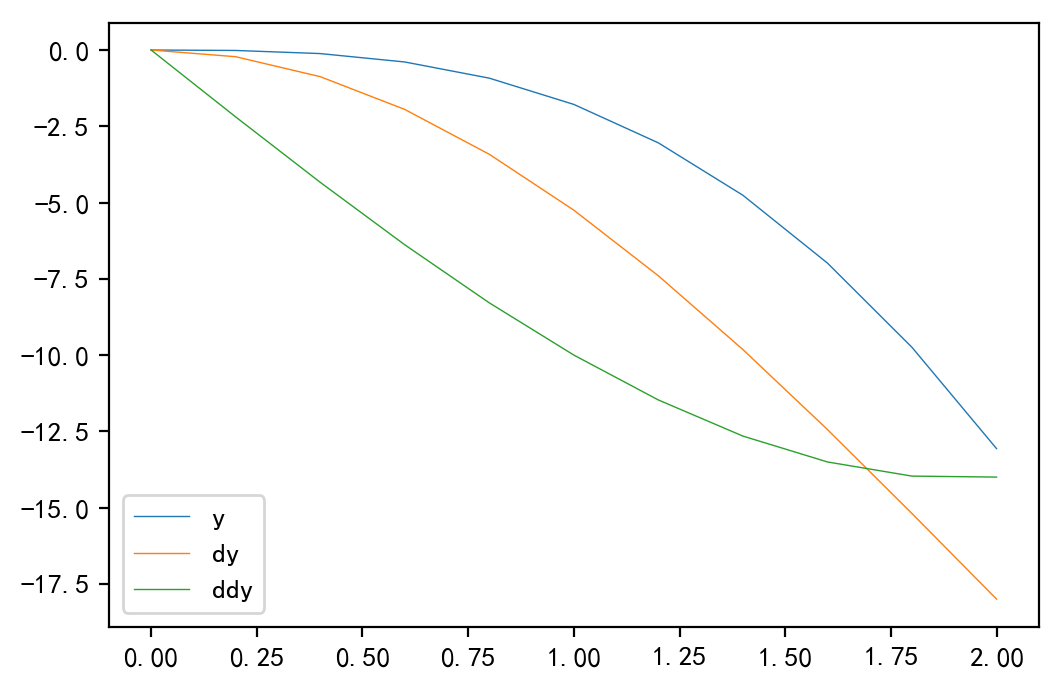

In [12]:
#函数1
a = 0
b = 2
n = 10

interval, h= slice_interval(a, b, n)

#计算函数的实际值
fun_list = []
for i in range(len(interval)):
    fun_list.append(fun1(interval[i]))

#计算一阶导数的实际值
dfun_list = []
for i in range(len(interval)):
    dfun_list.append(dfun1(interval[i]))

#计算二阶导数的实际值
ddfun_list = []
for i in range(len(interval)):
    ddfun_list.append(ddfun1(interval[i]))

dy1_list = dy1(interval, fun1, h)#向前差商法计算导数
dy2_list = dy2(interval, fun1, h)#向后差商法计算导数
dy3_list = dy3(interval, fun1, h)#中心差商法计算导数
ddy_list = ddy(interval, fun1, h)#计算二阶导数

print(n,"等分区间后，向前差商法所得导数与实际一阶导数的误差值（忽略右端点）：")
print(np.abs(np.array(dy1_list) - np.array(dfun_list)))
print(n,"等分区间后，向后差商法所得导数与实际一阶导数的误差值（忽略左端点）：")
print(np.abs(np.array(dy2_list) - np.array(dfun_list)))
print(n,"等分区间后，中心差商法所得导数与实际一阶导数的误差值（忽略左、右端点）：")
print(np.abs(np.array(dy3_list) - np.array(dfun_list)))
print(n,"等分区间后，所得二阶导数与实际二阶导数的误差值（忽略左、右端点）：")
print(np.abs(np.array(ddy_list) - np.array(ddfun_list)))

#做原函数、一阶导数、二阶导数图像
print("原函数、一阶导数、二阶导数图像为：")
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
plt.figure(dpi = 200)
y, = plt.plot(interval,fun_list,lw=0.5,label = 'y')
dy, = plt.plot(interval,dfun_list,lw=0.5, label = 'dy')
ddy, = plt.plot(interval,ddfun_list,lw=0.5, label = 'ddy')
plt.legend(handles=[y, dy, ddy], labels=['y', 'dy','ddy'],
    loc='lower left')
plt.show()

10000 等分区间后，向前差商法所得导数与实际一阶导数的误差值（忽略右端点）：
[2.29166066e-05 2.29231475e-05 2.29296899e-05 ... 2.35584845e-02
 2.36103361e-02 2.95562244e+01]
10000 等分区间后，向后差商法所得导数与实际一阶导数的误差值（忽略左端点）：
[2.38691952e-01 2.29187871e-05 2.29253277e-05 ... 2.35239963e-02
 2.35757525e-02 2.36276518e-02]
10000 等分区间后，中心差商法所得导数与实际一阶导数的误差值（忽略左、右端点）：
[2.38691952e-01 2.18019847e-09 2.18110452e-09 ... 1.72441305e-05
 1.72918181e-05 2.95562244e+01]
10000 等分区间后，所得二阶导数与实际二阶导数的误差值（忽略左、右端点）：
[2.29144274e-01 5.06615067e-09 1.21168575e-10 ... 1.19041838e-04
 1.19416213e-04 2.36449795e+02]
原函数、一阶导数、二阶导数图像为：


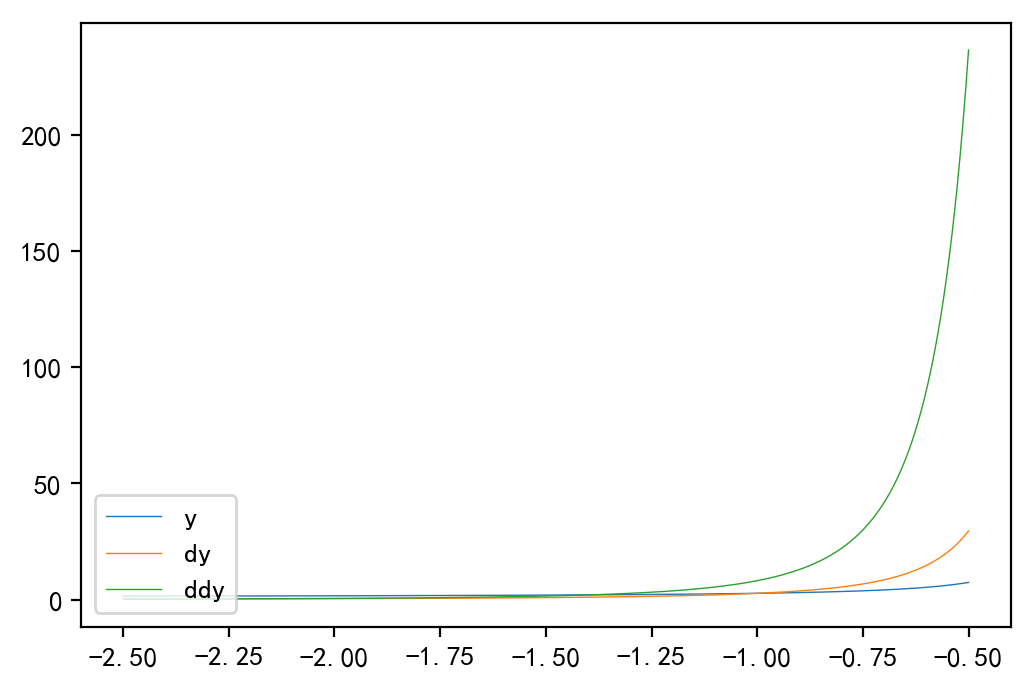

In [19]:
#函数2
a = -2.5
b = -0.5
n = 10000

interval, h= slice_interval(a, b, n)

#计算函数的实际值
fun_list = []
for i in range(len(interval)):
    fun_list.append(fun2(interval[i]))

#计算一阶导数的实际值
dfun_list = []
for i in range(len(interval)):
    dfun_list.append(dfun2(interval[i]))

#计算二阶导数的实际值
ddfun_list = []
for i in range(len(interval)):
    ddfun_list.append(ddfun2(interval[i]))

dy1_list = dy1(interval, fun2, h)#向前差商法计算导数
dy2_list = dy2(interval, fun2, h)#向后差商法计算导数
dy3_list = dy3(interval, fun2, h)#中心差商法计算导数
ddy_list = ddy(interval, fun2, h)#计算二阶导数

print(n,"等分区间后，向前差商法所得导数与实际一阶导数的误差值（忽略右端点）：")
print(np.abs(np.array(dy1_list) - np.array(dfun_list)))
print(n,"等分区间后，向后差商法所得导数与实际一阶导数的误差值（忽略左端点）：")
print(np.abs(np.array(dy2_list) - np.array(dfun_list)))
print(n,"等分区间后，中心差商法所得导数与实际一阶导数的误差值（忽略左、右端点）：")
print(np.abs(np.array(dy3_list) - np.array(dfun_list)))
print(n,"等分区间后，所得二阶导数与实际二阶导数的误差值（忽略左、右端点）：")
print(np.abs(np.array(ddy_list) - np.array(ddfun_list)))

#做原函数、一阶导数、二阶导数图像
print("原函数、一阶导数、二阶导数图像为：")
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
plt.figure(dpi = 200)
y, = plt.plot(interval,fun_list,lw=0.5,label = 'y')
dy, = plt.plot(interval,dfun_list,lw=0.5, label = 'dy')
ddy, = plt.plot(interval,ddfun_list,lw=0.5, label = 'ddy')
plt.legend(handles=[y, dy, ddy], labels=['y', 'dy','ddy'],
    loc='lower left')
plt.show()